In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from math import pi
from skimage.transform import resize
from PIL import Image
from skimage.measure import block_reduce
from skimage import restoration, exposure
from scipy.ndimage import rotate, convolve, sobel, laplace
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from scipy import fftpack

%matplotlib inline

os.chdir('code_scripts')
import visualization as viz
import tools
import ssr
os.chdir('../')

# Preprocessing : creating LR images and denoising (Rician noise)

In [2]:
data_path = 'HR_data/'

HR_ref = np.load(data_path+'image1.npy')
validation_image = np.load(data_path+'image2.npy')
scale = (np.min(HR_ref), np.max(HR_ref))

In [4]:
# Downsampling
LR_img = tools.downsample_z_axis(HR_ref, 2)

# Interpolation
LR_img_interp = tools.spline_interpolation(LR_img, HR_ref.shape, 2)
LR_img_interp = (LR_img_interp - np.min(LR_img_interp)) * 255.0 / (np.max(LR_img_interp) - np.min(LR_img_interp))

In [8]:
# Generating LR Validation image that we use for hyperparameter selection

LR_validation_image = tools.downsample_z_axis(validation_image, 2)
validation_img_interp = tools.spline_interpolation(LR_validation_image, HR_ref.shape, 2)
validation_img_interp = (validation_img_interp - np.min(validation_img_interp)) * 255.0 / (np.max(validation_img_interp) - np.min(validation_img_interp))

# Self Super-Resolution Algorithm Implementation

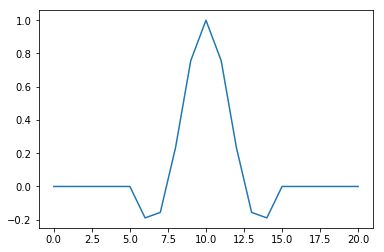

In [5]:
'''
    Creating the truncated sinc kernel - the actual cutoff was chosen somewhat arbitrarily
'''
x = np.linspace(-4, 4, 21)
sinc = np.sinc(x)
sinc[0:5] = 0
sinc[15:21] = 0
sinc_kernel = np.zeros(shape = (21,7))
sinc_kernel[:,3] = sinc
plt.plot(sinc)

## Regularization parameter tunning

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed


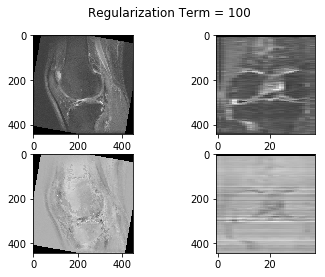

In [9]:
'''
Loop to iteratively test for the regularization parameter in our ridge regression using a validation set image
''' 
regularization_params = [0, .5, 1, 1.5, 2.0, 2.5, 5.0, 10, 100]

for regularization in regularization_params:
    validation_tweaking, projection = ssr.generate_images(validation_img_interp, sinc_kernel, 10, regularization, 36)
    validation_tweaking = rotate(validation_tweaking, 350, reshape = False)
    projection = rotate(projection, 350, reshape = False)
    plt.suptitle('Regularization Term = ' + str(regularization))
    plt.subplot(2, 2, 1)
    plt.imshow(validation_tweaking[:,:,15], cmap = 'gray')
    plt.subplot(2, 2, 2)
    viz.visualize_MRI_slice(validation_tweaking, 280, slice_direction = 1)
    plt.subplot(2, 2, 3)
    plt.imshow(projection[:,:,15], cmap = 'gray')
    plt.subplot(2, 2, 4)
    viz.visualize_MRI_slice(projection, 280, slice_direction = 1)
    print()

## Synthesizing Images for the Validation Image

In [10]:
synthesized_image1, projection_1 = ssr.generate_images(validation_img_interp, sinc_kernel, 2.5, 2.5, 36)
synthesized_image1 = rotate(synthesized_image1, 357.5, reshape = False)
print()

synthesized_image2, projection_2 = ssr.generate_images(validation_img_interp, sinc_kernel, 5, 2.5, 36)
synthesized_image2 = rotate(synthesized_image2, 355, reshape = False)
print()

synthesized_image3, projection_3 = ssr.generate_images(validation_img_interp, sinc_kernel, -2.5, 2.5, 36)
synthesized_image3 = rotate(synthesized_image3, 2.5, reshape = False)
print()

synthesized_image4, projection_4 = ssr.generate_images(validation_img_interp, sinc_kernel, -5, 2.5, 36)
synthesized_image4 = rotate(synthesized_image4, 5, reshape = False)

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created


In [11]:
# Concatenating generated images and original interpolated image into array
array = np.zeros(shape = (5, validation_img_interp.shape[0], validation_img_interp.shape[1], validation_img_interp.shape[2]))
array[0,:,:,:] = validation_img_interp
array[1,:,:,:] = synthesized_image1
array[2,:,:,:] = synthesized_image2
array[3,:,:,:] = synthesized_image3
array[4,:,:,:] = synthesized_image4

## Applying Fourier Burst Accumulation

### Tunning the parameter p of FBA (responsible for the frequency "burst")

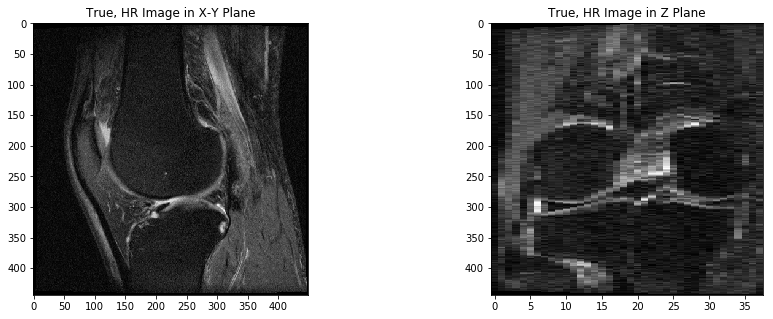

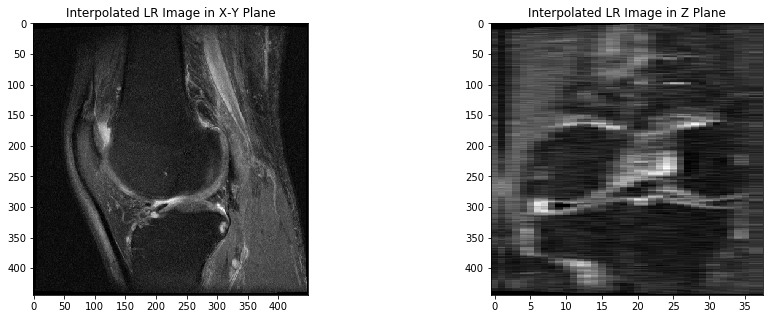

c:\users\kevin\anaconda3\lib\site-packages\ipykernel\__main__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part


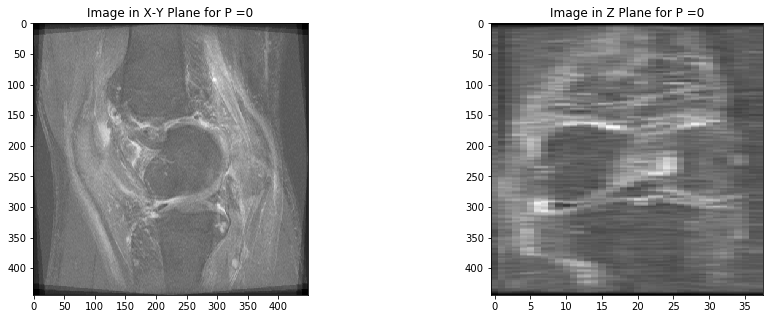

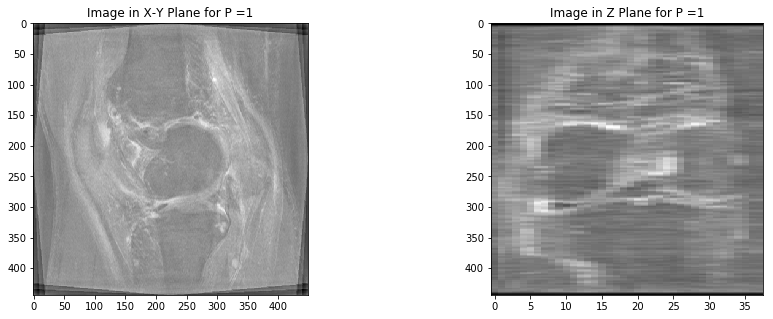

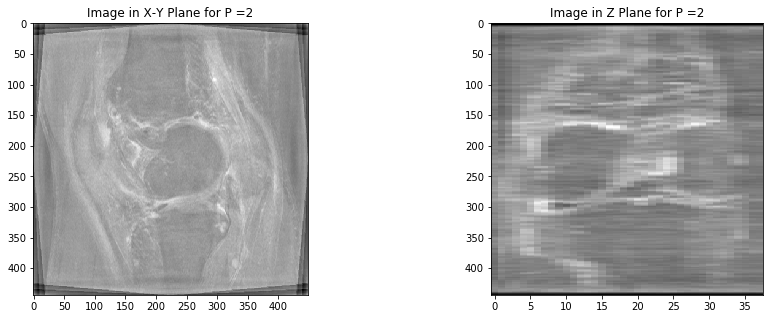

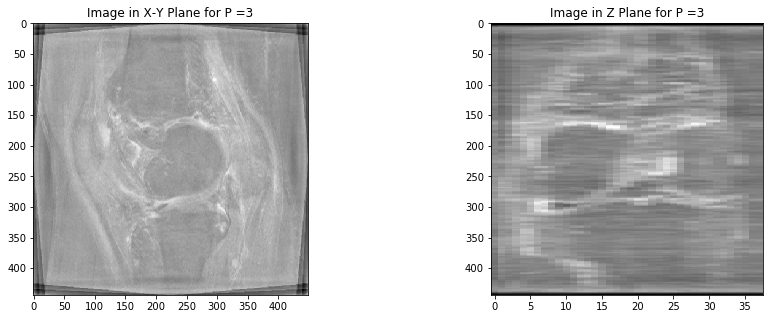

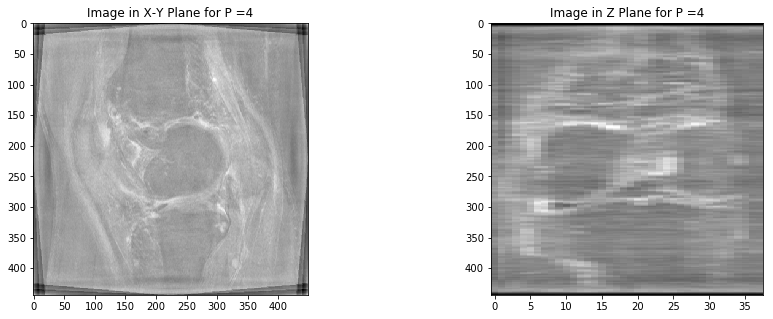

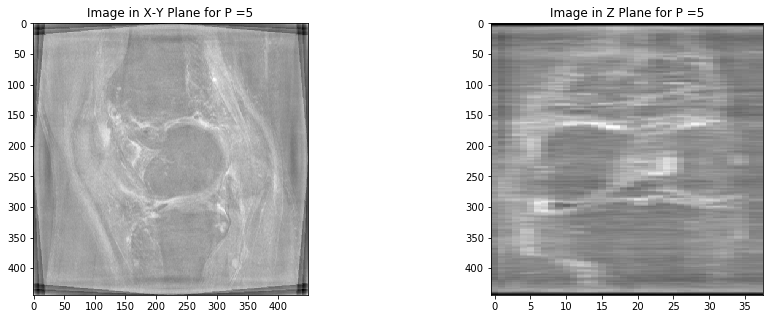

In [40]:
ssr.test_for_param_p(6, array, validation_image, validation_img_interp)

## Run Algorithm on the Test Image (LR image interpolated)

Tunning being done, we apply the method on the same method on which we applied the Example-based method.

In [9]:
synthesized_image1_test, projection_1 = ssr.generate_images(LR_img_interp, sinc_kernel, 2.5, 2.5, 36)
synthesized_image1_test = rotate(synthesized_image1_test, 357.5, reshape = False)
print()

synthesized_image2_test, projection_2 = ssr.generate_images(LR_img_interp, sinc_kernel, 5, 2.5, 36)
synthesized_image2_test = rotate(synthesized_image2_test, 355, reshape = False)
print()

synthesized_image3_test, projection_3 = ssr.generate_images(LR_img_interp, sinc_kernel, -2.5, 2.5, 36)
synthesized_image3_test = rotate(synthesized_image3_test, 2.5, reshape = False)
print()

synthesized_image4_test, projection_4 = ssr.generate_images(LR_img_interp, sinc_kernel, -5, 2.5, 36)
synthesized_image4_test = rotate(synthesized_image4_test, 5, reshape = False)

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created

Rotated Images Generated
Gradient Images Generated
Features Extracted and Compressed
Image Patches of Differenced Image are Acquired
Clusters Completed
Projection Matrices are Learned
Projected Image is Created


In [10]:
array_test = np.zeros(shape = (5, LR_img_interp.shape[0], LR_img_interp.shape[1], LR_img_interp.shape[2]))
array_test[0,:,:,:] = LR_img_interp
array_test[1,:,:,:] = synthesized_image1_test
array_test[2,:,:,:] = synthesized_image2_test
array_test[3,:,:,:] = synthesized_image3_test
array_test[4,:,:,:] = synthesized_image4_test

In [11]:
FBA_generated_image = ssr.fourier_burst_accumulation(0, array_test)

/Users/victordemurat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


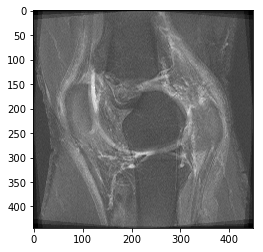

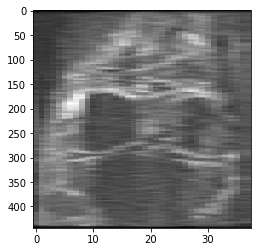

In [27]:
plt.imshow(FBA_generated_image[:,:,15], cmap='gray')
plt.figure()
viz.visualize_MRI_slice(FBA_generated_image, 280, 1)

In [12]:
FBA_generated_image_2 = exposure.rescale_intensity(FBA_generated_image)
FBA_generated_image_2 = (FBA_generated_image_2 - np.min(FBA_generated_image_2)
                        ) * 255.0 / (np.max(FBA_generated_image_2) - np.min(FBA_generated_image_2))

print('SNR for SSR result img : ' + str(np.std(FBA_generated_image_2[260:300,280,17:22])
                                        /np.std(FBA_generated_image_2 [210:250,280,9:14])))

SNR for SSR result img : 2.58919803634


In [32]:
#np.save('Results/ssr_img', FBA_generated_image)

## Other Experiments based on FBA, and some of the pre-processing steps we applied

As our implementation doesn't yield nice results, we tried other ideas based on this FBA principle. Here are some of them summarized.

### Test with just slightly rotated images
#### (replicates the typical setting of use of FBA, where the camera is going through some perturbations)

In [13]:
angles = np.array([-4,-3,-2,-1,1,2,3,4])*0.1

rotated_imgs = np.zeros(shape = (len(angles)+1, HR_ref.shape[0],HR_ref.shape[1],HR_ref.shape[2]))
for i,angle in enumerate(list(angles)):
    rotated_imgs[i,:,:,:] = rotate(LR_img_interp, angle, axes=(0,2), reshape=False)
rotated_imgs[len(angles),:,:,:] = LR_img_interp

In [16]:
fba_test = ssr.fourier_burst_accumulation(5, rotated_imgs)

/Users/victordemurat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


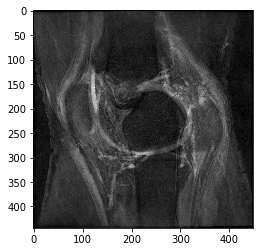

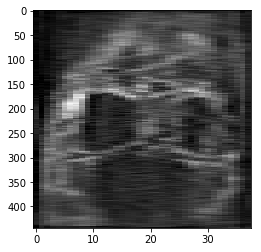

In [17]:
viz.visualize_MRI_slice(exposure.rescale_intensity(fba_test, scale), 15, slice_direction=2)
plt.figure()
viz.visualize_MRI_slice(exposure.rescale_intensity(fba_test, scale), 280, slice_direction=1)

## Sharpening the LR interpolated image with the Sobel gradient images created at step 2.

Laplacian had only very poor information / edge detection. On the contrary, Sobel are performing pretty well ! We used Sobel on the relevant axis (the one giving the best information on edges) and thresholded it so that it really sharpens the edges when we add it to the LR_img_interpolated

We tunned the weight assessed to the gradient image, so that it gives the best results visually

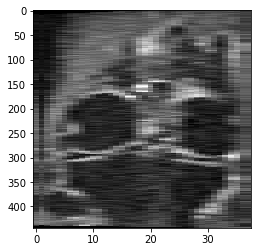

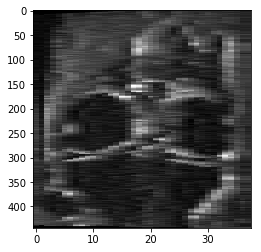

In [20]:
Sobel_x, Sobel_y, Sobel_z, _, _, _ = ssr.compute_gradient_images(LR_img_interp)
Sobel_z_2 = Sobel_z[:]
Sobel_z_2[Sobel_z_2 <= 2*np.mean(Sobel_z)] = 0.

viz.visualize_MRI_slice(LR_img_interp, 280, slice_direction = 1)
plt.figure()
viz.visualize_MRI_slice(exposure.rescale_intensity(LR_img_interp + 1/10.*Sobel_z_2, scale), 280, slice_direction = 1)

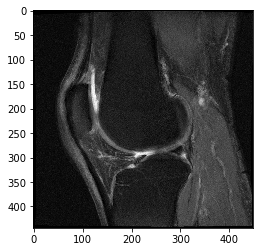

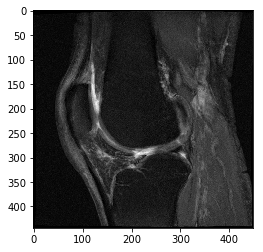

In [21]:
Sobel_z_2 = Sobel_z[:]
Sobel_z_2[Sobel_z_2 <= 1*np.mean(Sobel_z)] = 0.

viz.visualize_MRI_slice(LR_img_interp, 15, slice_direction = 2)
plt.figure()
viz.visualize_MRI_slice(exposure.rescale_intensity(LR_img_interp + 1/20.*Sobel_z_2, scale), 15, slice_direction = 2)
plt.figure()

### FBA on just the y_a0 and y_s0 images (for 4 angles)

We indeed also tested the use of FBA on just the y_a0 and y_s0 images that have been rotated in the same directions and angles as our final generated images

In [53]:
'''
    We also tested the use of FBA on just the y_a0 and y_s0 images that have been rotated
    in the same directions and angles as our final generated images
'''
_, y_a0_rotation1, y_s0_rotation1 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, 2.5)
y_a0_rotation1 = rotate(y_a0_rotation1, -2.5, reshape = False)
y_s0_rotation1 = rotate(y_s0_rotation1, -2.5, reshape = False)

_, y_a0_rotation2, y_s0_rotation2 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, 5)
y_a0_rotation2 = rotate(y_a0_rotation2, -5, reshape = False)
y_s0_rotation2 = rotate(y_s0_rotation2, -5, reshape = False)

_, y_a0_rotation3, y_s0_rotation3 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, -2.5)
y_a0_rotation3 = rotate(y_a0_rotation3, 2.5, reshape = False)
y_s0_rotation3 = rotate(y_s0_rotation3, 2.5, reshape = False)

_, y_a0_rotation4, y_s0_rotation4 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, -5)
y_a0_rotation4 = rotate(y_a0_rotation4, 5, reshape = False)
y_s0_rotation4 = rotate(y_s0_rotation4, 5, reshape = False)

In [57]:
rotate_array_v1 = np.zeros(shape = (9, LR_img_interp.shape[0], LR_img_interp.shape[1], LR_img_interp.shape[2]))
rotate_array_v1[0,:,:,:] = LR_img_interp
rotate_array_v1[1,:,:,:] = y_a0_rotation1
rotate_array_v1[2,:,:,:] = y_s0_rotation1
rotate_array_v1[3,:,:,:] = y_a0_rotation2
rotate_array_v1[4,:,:,:] = y_s0_rotation2
rotate_array_v1[5,:,:,:] = y_a0_rotation3
rotate_array_v1[6,:,:,:] = y_s0_rotation3
rotate_array_v1[7,:,:,:] = y_a0_rotation4
rotate_array_v1[8,:,:,:] = y_s0_rotation4

c:\users\kevin\anaconda3\lib\site-packages\ipykernel\__main__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part


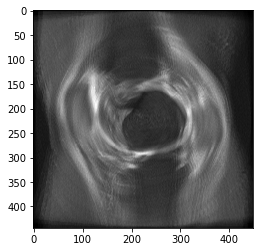

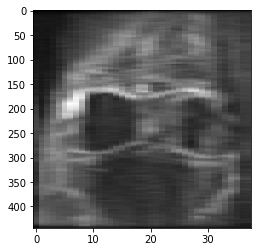

In [61]:
FBA_generated_image_with_only_rotations = ssr.fourier_burst_accumulation(0, rotate_array_v1)
plt.imshow(FBA_generated_image_with_only_rotations[:,:,15], cmap='gray')
plt.figure()
viz.visualize_MRI_slice(FBA_generated_image_with_only_rotations, 280, 1)

In [72]:
'''
    We also tested FBA on the y_a0 and y_s0 images that have been rotated in much larger degree ranges across the x-y plane 
    We rotated over 90, 180, and 270 degrees.
    This achieved very subpar results
'''
_, y_a0_rotation1, y_s0_rotation1 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, 90)
y_a0_rotation1 = rotate(y_a0_rotation1, -90, reshape = False)
y_s0_rotation1 = rotate(y_s0_rotation1, -90, reshape = False)

_, y_a0_rotation2, y_s0_rotation2 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, 180)
y_a0_rotation2 = rotate(y_a0_rotation2, -180, reshape = False)
y_s0_rotation2 = rotate(y_s0_rotation2, -180, reshape = False)

_, y_a0_rotation3, y_s0_rotation3 = ssr.generate_rotated_images(LR_img_interp, sinc_kernel, 270)
y_a0_rotation3 = rotate(y_a0_rotation3, -270, reshape = False)
y_s0_rotation3 = rotate(y_s0_rotation3, -270, reshape = False)


In [73]:
rotate_array_v1 = np.zeros(shape = (7, LR_img_interp.shape[0], LR_img_interp.shape[1], LR_img_interp.shape[2]))
rotate_array_v1[0,:,:,:] = LR_img_interp
rotate_array_v1[1,:,:,:] = y_a0_rotation1
rotate_array_v1[2,:,:,:] = y_s0_rotation1
rotate_array_v1[3,:,:,:] = y_a0_rotation2
rotate_array_v1[4,:,:,:] = y_s0_rotation2
rotate_array_v1[5,:,:,:] = y_a0_rotation3
rotate_array_v1[6,:,:,:] = y_s0_rotation3

c:\users\kevin\anaconda3\lib\site-packages\ipykernel\__main__.py:16: ComplexWarning: Casting complex values to real discards the imaginary part


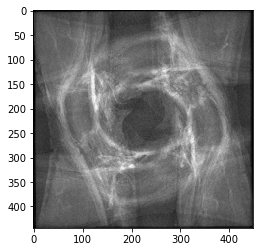

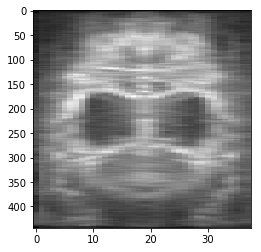

In [74]:
FBA_generated_image_with_only_rotations = ssr.fourier_burst_accumulation(0, rotate_array_v1)
plt.imshow(FBA_generated_image_with_only_rotations[:,:,15], cmap='gray')
plt.figure()
viz.visualize_MRI_slice(FBA_generated_image_with_only_rotations, 280, 1)